In [1]:
import numpy as np
def gaussian_kernel(x1,x2,sigma):
    return np.exp(-sum((x1-x2)**2) / (2*sigma**2))

x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2

sim = gaussian_kernel(x1,x2,sigma)
print(sim)

0.32465246735834974


In [2]:
import pandas as pd

data = pd.read_csv('ex6data2.csv',header=None)
print(data.head())

          0         1  2
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1


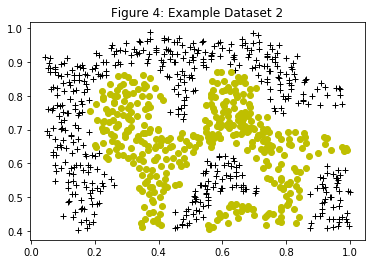

In [6]:
from matplotlib import pyplot as plt
def plotData(data,title):
    positive_examples = data[data[2]==1]
    negative_examples = data[data[2]==0]
    
    plt.plot(positive_examples[0],positive_examples[1], 'k+',
             negative_examples[0],negative_examples[1], 'yo')
    plt.title(title)
    plt.show()
    
    
plotData(data,"Figure 4: Example Dataset 2")
    

In [4]:
from sklearn import svm

X = data.as_matrix([0,1])
y = data.as_matrix([2])
# https://scikit-learn.org/stable/modules/svm.html#svm-kernels
sigma = 0.1
gamma = 1 / (2*sigma**2)
print('gamma is: ', gamma)
model = svm.SVC(kernel='rbf',gamma=gamma)
reg = model.fit(X,y)


gamma is:  49.99999999999999


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


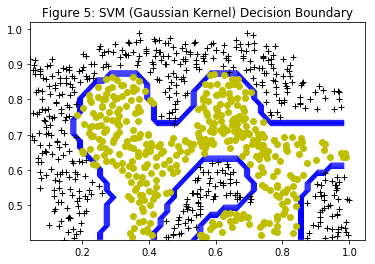

In [5]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x,y,h=0.02):
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                         np.arange(y_min,y_max,h))
    
    return xx,yy

def plot_contours(clf, xx, yy):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,colors='b', linewidths=1)
    plotData(data,'Figure 5: SVM (Gaussian Kernel) Decision Boundary')
    
X0,X1 = X[:,0],X[:,1]
xx, yy = make_meshgrid(X0,X1)

plot_contours(reg,xx,yy)

